Import Libraries

In [113]:
import os
import re
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score




Get the newest data

In [114]:
def get_newest_data():
    # Check for env variable - error if not present
    envP7RootDir = os.getenv("P7RootDir")
    if envP7RootDir is None:
        print("---> If you are working in vscode\n---> you need to restart the aplication\n---> After you have made a env\n---> for vscode to see it!!")
        print("---> You need to make a env called 'P7RootDir' containing the path to P7 root dir")
        raise ValueError('Environment variable not found (!env)')

    #Enter CSV directory
    workDir = envP7RootDir + "\\Data\\CSV files"

    #Find all dates from the files
    dirDates = []
    for file in os.listdir(workDir):
        onlyDate = re.findall(r'\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2}', file)
        new_string = str(onlyDate).replace("-", "")
        new_string = new_string.replace("_","")
        new_string = new_string.strip("[]'")
        dirDates.append([int(new_string),file])

    #Sort dates and return newest
    dirDates = sorted(dirDates,key=lambda l:l[1],reverse=True) # Take oldest data first i belive 
    return(workDir + "\\" + dirDates[0][1])
NewestDataFileName = get_newest_data()
print(NewestDataFileName)


C:\Users\caspe\Aalborg Universitet\Marcus Mogensen - 7. semester\P7\Data\CSV files\2024-10-22_15-12-43_audio_features_with_labels.csv


Read the CSV file

Accuracy: 0.9887640449438202


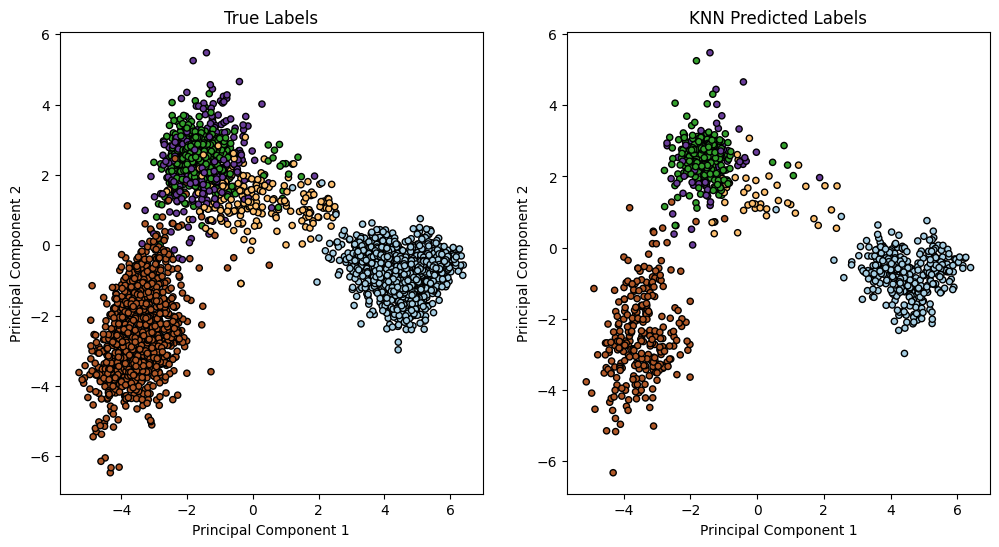

In [115]:
from sklearn.decomposition import PCA
# Load your data
df = pd.read_csv(NewestDataFileName)  # Replace with your data file path

# Remove filename column
df = df.drop(['Filename'], axis=1)

# Extract labels and encode them
labels = df['Label'].values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Keep data
data = df.drop(['Label'], axis=1).values

# Scale the data to have 0 mean and variance 1 - recommended step by sklearn
X = StandardScaler().fit_transform(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, stratify=labels, random_state=0)

# Create a KNN classifier pipeline
clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
)

# Fit the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Plot the KNN classification results using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the true labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.title('True Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Plot the predicted labels
# Transform the test set using the same PCA transformation
X_test_pca = pca.transform(X_test)
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolor='k', s=20)
plt.title('KNN Predicted Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()